# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`This is how we write code`

## Let's make some data to work on

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
# Visualising the results
def plot_model(classifier, X_set, y_set, y_test, y_pred, text):
  from matplotlib.colors import ListedColormap
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('pink', 'cyan')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
  plt.title(text)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.legend()
  plt.show()

In [0]:
def softmax(x):
    """ 
    applies softmax to an input x
    https://www.python-course.eu/ 
    """
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [0]:
def cross_entropy(y_test, y_pred):
    y_prob = softmax(y_pred)
    Y = np.float_(y_test)
    P = np.float_(y_prob)
    ce = -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))
    return ce

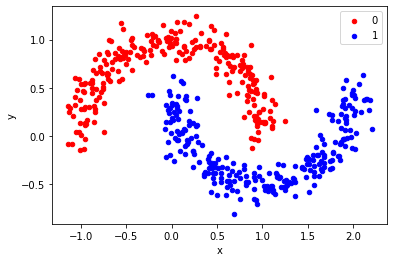

In [47]:
from sklearn.datasets.samples_generator import make_moons
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_blobs
# generate 2d classification dataset
n = 500
X, y = make_moons(n_samples=n, noise=0.1)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

datadict = {'X1': X[:,0],'X2' : X[:,1], 'target': y}
data = pd.DataFrame(data=datadict)


In [48]:
X = data.iloc[:,[0, 1]].values
type(X)

numpy.ndarray

In [0]:
y = data.target.values

In [0]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [0]:
N, D = X_train.shape

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


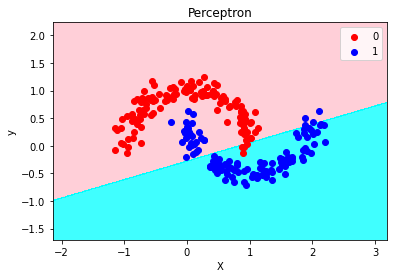

Cross entropy 697.3519014987298 


In [56]:
from sklearn.linear_model import Perceptron
classifier = Perceptron()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, y_test, y_pred, "Perceptron")
print("Cross entropy {} ".format(cross_entropy(y_test,y_pred)))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


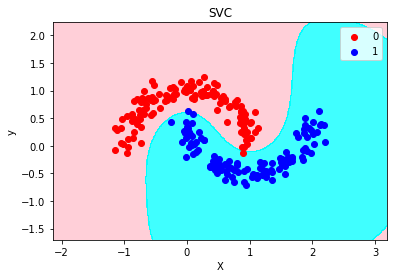

Cross entropy 676.6711547600337 


In [57]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train,  y_test, y_pred,  "SVC")
print("Cross entropy {} ".format(cross_entropy(y_test,y_pred)))